In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
all_indices = pd.read_csv('./Dataset/all_indices.csv')
all_indices = all_indices.rename(columns = {"Date":"Attributions","Time Series":"Tickers"})
all_indices = all_indices.set_index(["Tickers","Attributions"])
all_indices.columns = pd.to_datetime(all_indices.columns)
all_indices = all_indices.fillna(axis = 1, method='bfill')
all_indices = all_indices.replace({',':''},regex=True).apply(pd.to_numeric,axis=1)


In [24]:
all_indices = all_indices.loc[:,(all_indices.columns > pd.Timestamp("20190101"))& (all_indices.columns < pd.Timestamp("20230101"))]
all_indices

2022-12-30    2022-12-29    2022-12-28    2022-12-23  \
Tickers Attributions                                                          
$RTRE   Open               164.29  1.621300e+02  1.646200e+02  1.639500e+02   
        High               165.60  1.655900e+02  1.660100e+02  1.657400e+02   
        Low                164.16  1.621100e+02  1.621000e+02  1.639200e+02   
        Close              165.07  1.649000e+02  1.625300e+02  1.655600e+02   
        Volume         3082588.00  4.109991e+06  5.503511e+06  5.704975e+06   
...                           ...           ...           ...           ...   
$TXCI   Open              1296.23  1.290200e+03  1.299300e+03  1.293260e+03   
        High              1301.59  1.302750e+03  1.303320e+03  1.302600e+03   
        Low               1288.96  1.289690e+03  1.286620e+03  1.290180e+03   
        Close             1292.58  1.300770e+03  1.288000e+03  1.302430e+03   
        Volume        95370534.00  1.038324e+08  1.435575e+08  1.058479e+08   

                        2022-12-22    2022-12-21    2022-12-20    2022-12-19  \
Tickers Attributions                                                           
$RTRE   Open          1.651800e+02  1.639000e+02  1.619900e+02  1.662800e+02   
        High          1.653100e+02  1.667300e+02  1.635700e+02  1.663600e+02   
        Low           1.629900e+02  1.635600e+02  1.619400e+02  1.628100e+02   
        Close         1.643300e+02  1.659300e+02  1.630400e+02  1.631100e+02   
        Volume        5.396368e+06  5.882151e+06  5.345179e+06  7.451400e+06   
...                            ...           ...           ...           ...   
$TXCI   Open          1.300720e+03  1.299730e+03  1.284840e+03  1.297970e+03   
        High          1.300690e+03  1.308550e+03  1.295580e+03  1.300240e+03   
        Low           1.280980e+03  1.300030e+03  1.282470e+03  1.280170e+03   
        Close         1.292290e+03  1.306470e+03  1.290560e+03  1.283200e+03   
        Volume        1.261118e+08  1.176905e+08  1.500524e+08  1.727414e+08   

                        2022-12-16    2022-12-15  ...   2019-01-15  \
Tickers Attributions                              ...                
$RTRE   Open          1.671200e+02  1.686300e+02  ...       172.34   
        High          1.672700e+02  1.689700e+02  ...       172.69   
        Low           1.657800e+02  1.673800e+02  ...       172.09   
        Close         1.661700e+02  1.683000e+02  ...       172.35   
        Volume        1.309068e+07  4.365722e+06  ...   7209500.00   
...                            ...           ...  ...          ...   
$TXCI   Open          1.295860e+03  1.316260e+03  ...       991.86   
        High          1.301480e+03  1.316670e+03  ...       997.32   
        Low           1.291260e+03  1.302310e+03  ...       989.49   
        Close         1.296770e+03  1.308190e+03  ...       995.45   
        Volume        3.238607e+08  1.595196e+08  ...  90051904.00   

                       2019-01-14   2019-01-11    2019-01-10    2019-01-09  \
Tickers Attributions                                                         
$RTRE   Open               171.69       170.49  1.689500e+02  1.679400e+02   
        High               172.78       172.19  1.707100e+02  1.694100e+02   
        Low                171.50       170.48  1.684300e+02  1.676400e+02   
        Close              172.73       172.05  1.702800e+02  1.691900e+02   
        Volume         4482400.00   6011100.00  5.640500e+06  5.034800e+06   
...                           ...          ...           ...           ...   
$TXCI   Open               985.67       984.91  9.771400e+02  9.709900e+02   
        High               991.59       988.78  9.873100e+02  9.799500e+02   
        Low                983.55       981.57  9.730700e+02  9.683200e+02   
        Close              989.84       987.90  9.860600e+02  9.796400e+02   
        Volume        93343696.00  96537104.00  1.126992e+08  1.347889e+08   

                        2019

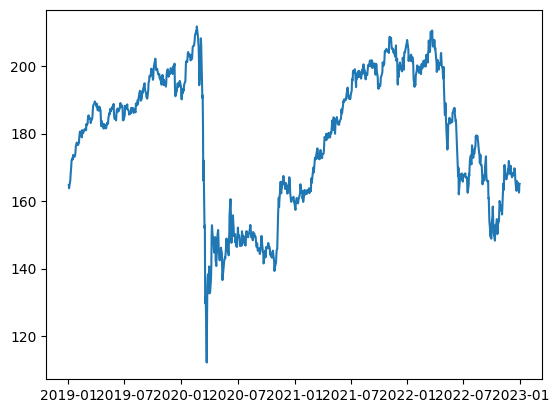

In [26]:
#all_indices = all_indices.dropna(axis=1)
plt.plot(all_indices.loc['$RTRE'].loc['Close'])
plt.show()


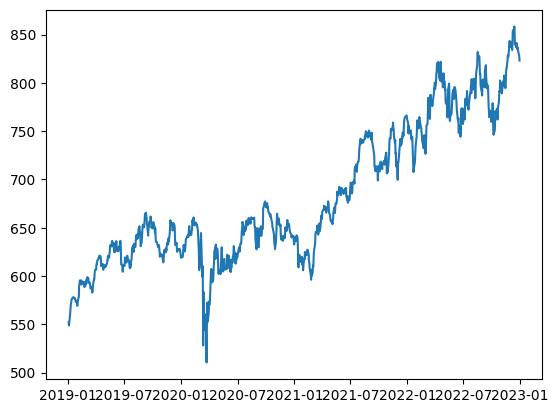

In [25]:
plt.plot(all_indices.loc['$TTCS'].loc['Close'])
plt.show()

In [5]:
tickers = all_indices.index.get_level_values(0).unique().to_list()
tickers

['$RTRE',
 '$TOOC',
 '$TTCD',
 '$TTCS',
 '$TTEN',
 '$TTFS',
 '$TTHC',
 '$TTIN',
 '$TTMT',
 '$TTRE',
 '$TTTK',
 '$TTTS',
 '$TTUT',
 '$TXCI']

In [6]:
close = {}
calcs = {}
def all_close(ticker):
    return pd.DataFrame(all_indices.loc[ticker,'Close'][::-1]).dropna()
for ticker in tickers:
    close["{0}".format(ticker)] = all_close(ticker)
    close[ticker][ticker,'Daily Return'] = close[ticker].pct_change(1)
    calcs["{0}_AnnualReturn".format(ticker)] = np.mean(close[ticker][ticker,'Daily Return'])*100*30*12
    calcs["{0}_Risk".format(ticker)] = np.std(close[ticker][ticker,'Daily Return'])*100*np.sqrt(30*12)
    calcs["{0}_Price".format(ticker)] = close[ticker][ticker,'Close'][-1]


In [7]:
print(calcs)

{'$RTRE_AnnualReturn': 3.901877363981021, '$RTRE_Risk': 27.379280459662986, '$RTRE_Price': 165.07, '$TOOC_AnnualReturn': 13.552813570922945, '$TOOC_Risk': 23.313630370457716, '$TOOC_Price': 22458.86, '$TTCD_AnnualReturn': 17.47927705451457, '$TTCD_Risk': 30.049054076155585, '$TTCD_Price': 252.03, '$TTCS_AnnualReturn': 16.59119787867385, '$TTCS_Risk': 21.176997606447312, '$TTCS_Price': 823.08, '$TTEN_AnnualReturn': 33.93491027199171, '$TTEN_Risk': 52.767589707763854, '$TTEN_Price': 243.0, '$TTFS_AnnualReturn': 13.108585916636706, '$TTFS_Risk': 26.961351586153267, '$TTFS_Price': 352.02, '$TTHC_AnnualReturn': -39.52152327141674, '$TTHC_Risk': 56.19391333199417, '$TTHC_Price': 19.42, '$TTIN_AnnualReturn': 21.13021247624598, '$TTIN_Risk': 23.518756564580436, '$TTIN_Price': 381.42, '$TTMT_AnnualReturn': 20.504781070886665, '$TTMT_Risk': 33.99585270714011, '$TTMT_Price': 327.68, '$TTRE_AnnualReturn': 4.723578943094832, '$TTRE_Risk': 27.414292833424778, '$TTRE_Price': 300.88, '$TTTK_AnnualRetu

In [27]:
sample_df = pd.DataFrame(list(calcs.items()))
sample_df.transpose()
sample_df.to_excel('Dataset/out.xlsx')
sample_df

,0,1
0,$RTRE_AnnualReturn,3.901877
1,$RTRE_Risk,27.379280
2,$RTRE_Price,165.070000
3,$TOOC_AnnualReturn,13.552814
4,$TOOC_Risk,23.313630
5,$TOOC_Price,22458.860000
6,$TTCD_AnnualReturn,17.479277
7,$TTCD_Risk,30.049054
8,$TTCD_Price,252.030000
9,$TTCS_AnnualReturn,16.591198
